# Unsupervised Machine Learning: Clustering songs

#### used dataset: 5000 songs "df_audio_features_5000.csv"

# 1. Read the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the csv file
url = "https://drive.google.com/file/d/1WFURiXNQd6RN_oQH9i8UpNHAhCLFzvoT/view?usp=share_link" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
audio_features = pd.read_csv(path)

In [3]:
audio_features.head(3)

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.259,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.742,0.399,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.851,0.730,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...


In [4]:
audio_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5235 entries, 0 to 5234
Data columns (total 18 columns):
 #   Column                                                                                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                                                                                             --------------  -----  
 0   name                                                                                                                                                                               5235 non-null   object 
 1   artist                                                                                                                                                                             5235 non-null   object 
 2   danceability                                            

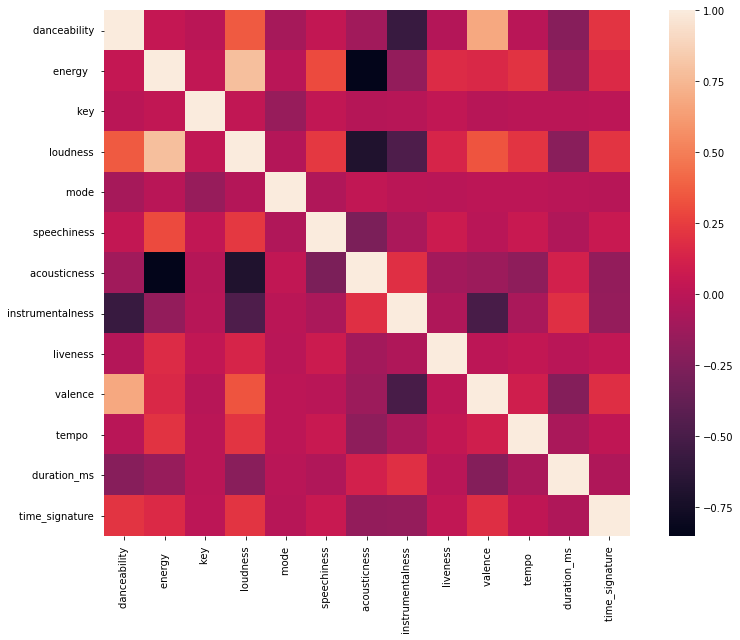

In [5]:
# creating a correlation matrix
corr = audio_features.corr()

# plotting the heatmap
f, ax = plt.subplots(figsize=(12,9))

sns.heatmap(corr, square=True, linecolor='white', vmax=1.0, annot=False,);
plt.tight_layout()

# 2. Clean the data

In [6]:
#see title of the columns
audio_features.columns

Index(['name                                                                                                                                                                             ',
       'artist                                          ', 'danceability ',
       'energy   ', 'key ', 'loudness ', 'mode ', 'speechiness ',
       'acousticness ', 'instrumentalness ', 'liveness ', 'valence ',
       'tempo   ', 'type ', 'duration_ms ', 'time_signature ',
       'id                     ', 'html'],
      dtype='object')

In [7]:
audio_features = audio_features.rename(columns={'name                                                                                                                                                                             ': 'name', 'artist                                          ': 'artist', 'danceability ': 'danceability', 'energy   ': 'energy', 'key ': 'key', 'loudness ': 'loudness', 'mode ': 'mode', 'speechiness ': 'speechiness', 'acousticness ': 'acousticness', 'instrumentalness ': 'instrumentalness', 'liveness ': 'liveness', 'valence ': 'valence', 'tempo   ': 'tempo', 'type ': 'type', 'duration_ms ': 'duration_ms', 'time_signature ': 'time_signature', 'id                     ': 'id'})

In [8]:
audio_features.columns

Index(['name', 'artist', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'duration_ms', 'time_signature', 'id',
       'html'],
      dtype='object')

In [9]:
# To delete duplicates records
audio_features.drop_duplicates()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.6580,0.25900,11,-13.141,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.7420,0.39900,2,-12.646,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.8510,0.73000,2,-11.048,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
3,Mulher Eu Sei ...,Chico César,0.7050,0.05020,4,-18.115,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
4,Rosa Morena ...,Kurt Elling,0.6510,0.11900,6,-19.807,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,"1812 Festival Overture, Op. 49: 1812 Overture,...",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,,995000,4,1aEhYlZtypmipA06SDJ4U3,https://open.spotify.com/track/1aEhYlZtypmipA0...
5231,"Winter Fragments pour ensemble instrumental, s...",Tristan Murail,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,,855000,4,1Gfqe7TAKklmuZf6hxsH6h,https://open.spotify.com/track/1Gfqe7TAKklmuZf...
5232,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",Arnold Schoenberg,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,,238187,3,2XNwnFrdMDpismp0VUZ7cU,https://open.spotify.com/track/2XNwnFrdMDpismp...
5233,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",Antonín Dvořák,0.1330,0.02080,4,-29.443,1,0.0419,0.883,0.505000,0.1110,0.0591,67.109,,314307,4,7ucDwgMtE3YJtEfTbuRhy0,https://open.spotify.com/track/7ucDwgMtE3YJtEf...


In [10]:
# checking most recurrent artists in Brazil
n = 10
print("Most Famous Artists in Brazil")
audio_features['artist'].value_counts()[:n]

Most Famous Artists in Brazil


Death                                               29
Obituary                                            29
Deicide                                             26
Morbid Angel                                        26
David Guetta                                        24
Henry Smith                                         24
Cannibal Corpse                                     24
Asphyx                                              23
Martin Garrix                                       23
Broken Hope                                         20
Name: artist, dtype: int64

In [11]:
#drop columns which are not useful
audio_features.drop(['key', 'mode', 'type', 'liveness', 'duration_ms', 'time_signature', 'id', 'html'], axis=1, inplace=True)

In [12]:
audio_features.columns

Index(['name', 'artist', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'valence', 'tempo'],
      dtype='object')

In [13]:
audio_features.head(3)

,name,artist,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.259,-13.141,0.0705,0.694,0.000059,0.306,110.376
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.742,0.399,-12.646,0.0346,0.217,0.000002,0.693,125.039
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.851,0.730,-11.048,0.3470,0.453,0.000063,0.905,93.698


In [14]:
audio_features.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo
count,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000
mean,0.509503,0.653565,-9.338098,0.083178,0.290043,0.257337,0.443596,118.721407
std,0.218041,0.288335,6.294850,0.071193,0.355985,0.370686,0.277725,28.568463
min,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.309000,0.479000,-11.337000,0.039000,0.002450,0.000001,0.196000,96.174000
50%,0.539000,0.738000,-7.338000,0.055800,0.095400,0.001880,0.417000,119.180000
75%,0.688000,0.893000,-5.264000,0.098650,0.565500,0.643000,0.677000,134.019000
max,0.967000,1.000000,1.342000,0.918000,0.996000,0.985000,0.985000,213.990000


In [15]:
#set song_name and artist as index
af = audio_features.set_index(['name', 'artist'])

In [16]:
af.head(3)

,,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo
name,artist,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.658,0.259,-13.141,0.0705,0.694,0.000059,0.306,110.376
Saudade De Bahia,Antônio Carlos Jobim,0.742,0.399,-12.646,0.0346,0.217,0.000002,0.693,125.039
"Canta Canta, Minha Gente",Martinho Da Vila,0.851,0.730,-11.048,0.3470,0.453,0.000063,0.905,93.698


In [17]:
af.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo
count,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000
mean,0.509503,0.653565,-9.338098,0.083178,0.290043,0.257337,0.443596,118.721407
std,0.218041,0.288335,6.294850,0.071193,0.355985,0.370686,0.277725,28.568463
min,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.309000,0.479000,-11.337000,0.039000,0.002450,0.000001,0.196000,96.174000
50%,0.539000,0.738000,-7.338000,0.055800,0.095400,0.001880,0.417000,119.180000
75%,0.688000,0.893000,-5.264000,0.098650,0.565500,0.643000,0.677000,134.019000
max,0.967000,1.000000,1.342000,0.918000,0.996000,0.985000,0.985000,213.990000


# 2. Scaling

### 2.1 Min & Max scaling

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
my_min_max = MinMaxScaler(feature_range=(0,1))

In [20]:
my_min_max.fit(af)

MinMaxScaler()

In [21]:
min_max_df = my_min_max.transform(af)

In [22]:
min_max_df = pd.DataFrame(min_max_df,
             index=af.index,
             columns=af.columns)

In [23]:
min_max_df.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo
count,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000
mean,0.526890,0.653565,0.825893,0.090608,0.291208,0.261255,0.450352,0.554799
std,0.225482,0.288335,0.102619,0.077552,0.357414,0.376331,0.281954,0.133504
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.319545,0.479000,0.793306,0.042484,0.002460,0.000001,0.198985,0.449432
50%,0.557394,0.738000,0.858498,0.060784,0.095783,0.001909,0.423350,0.556942
75%,0.711479,0.893000,0.892309,0.107462,0.567771,0.652792,0.687310,0.626286
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


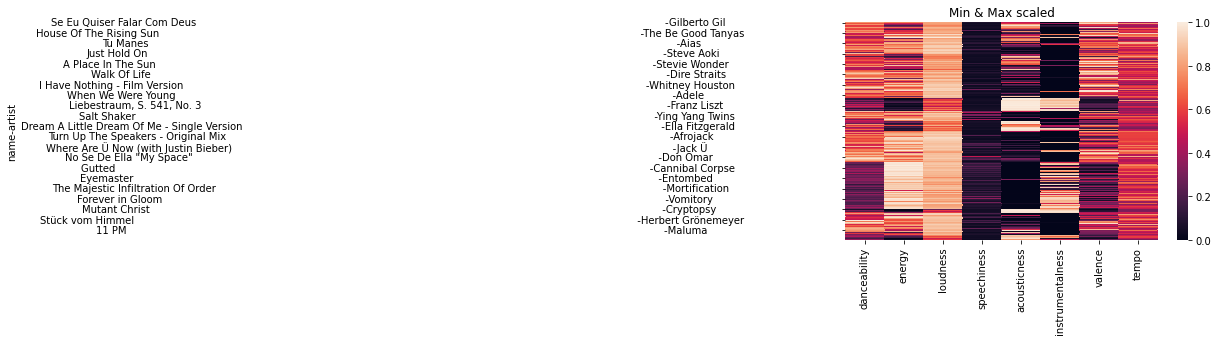

In [27]:
import seaborn as sns
plt.subplots(figsize=(7, 4))
sns.heatmap(min_max_df) 
plt.title('Min & Max scaled');

Text(0.5, 1.0, 'No scaling applied')

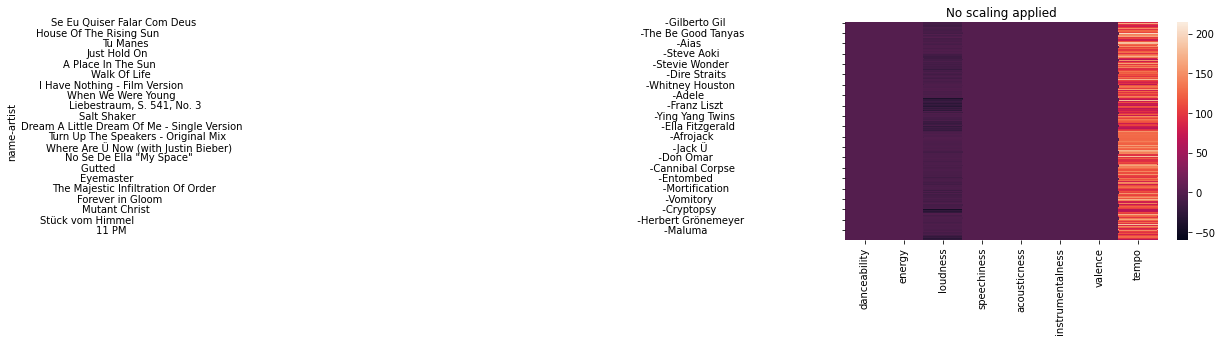

In [25]:
plt.subplots(figsize=(7, 4))
sns.heatmap(af) 
plt.title('No scaling applied')

### 2.2 Robust scaling

In [26]:
from sklearn.preprocessing import RobustScaler
robust_df = RobustScaler().fit_transform(af)
robust_df = pd.DataFrame(robust_df, columns=af.columns, index=af.index)

In [27]:
robust_df.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo
count,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000
mean,-0.077828,-0.203950,-0.329343,0.458981,0.345694,0.397289,0.055294,-0.012118
std,0.575306,0.696461,1.036531,1.193515,0.632244,0.576496,0.577391,0.754881
min,-1.422164,-1.782609,-8.671497,-0.935457,-0.169434,-0.002924,-0.866944,-3.149161
25%,-0.606860,-0.625604,-0.658488,-0.281643,-0.165083,-0.002922,-0.459459,-0.607901
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.393140,0.374396,0.341512,0.718357,0.834917,0.997078,0.540541,0.392099
max,1.129288,0.632850,1.429277,14.454317,1.599503,1.528960,1.180873,2.505219


# Clustering

In [28]:
from sklearn.cluster import KMeans

In [ ]:
from sklearn.cluster import KMeans
score_list = []
for i in range(20,100):
    kmeans_model = KMeans(n_clusters=i, random_state=1).fit(min_max_df)
    preds = kmeans_model.predict(min_max_df)
    score_list.append(kmeans_model.inertia_)

KeyboardInterrupt: ignored

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt: 


In [ ]:
score_list

## Inertia

In [ ]:
# Visualization of different cluster size performations
pd.DataFrame(score_list, index=range(20, 100)).plot(legend=False).set(xlabel="Cluster Range", ylabel="Inertia Score");

## Silhouette

In [ ]:
#silhouette coefficient
from sklearn.metrics import silhouette_score
#seed = 1

sil_scores = [] 
for i in range(20,100):
    km = KMeans(n_clusters= i, random_state=1)
    km.fit(min_max_df)
    sil_scores.append(silhouette_score(min_max_df, km.labels_))

In [ ]:
sil_scores

In [ ]:
pd.DataFrame(sil_scores, index=range(20, 100)).plot(legend=False).set(xlabel="Cluster Range", ylabel="Silhouette Score");

# K-means

In [ ]:
#import the model
from sklearn.cluster import KMeans

In [ ]:
#initialize the model
my_kmeans = KMeans(n_clusters= 60)

In [ ]:
#fit the model to the data
my_kmeans.fit(min_max_df)

In [ ]:
#obtain the cluster output
clusters = my_kmeans.predict(min_max_df)

In [ ]:
#attach the cluster output to our original DataFrame
min_max_df["cluster"] = clusters

In [ ]:
clusters

In [ ]:
min_max_df.head(3)

In [ ]:
min_max_df.groupby('cluster').count()

In [ ]:
# Grouping clusters to see the averages
clusters = min_max_df \
    .groupby('cluster') \
    .agg('mean')
clusters 

In [ ]:
min_max_df.groupby("cluster").describe() 

**Cluster Analysis**

In [ ]:
cluster_6 = min_max_df.loc[min_max_df['cluster'] == 6]

In [ ]:
cluster_10 = min_max_df.loc[min_max_df['cluster'] == 10]

In [ ]:
cluster_50 = min_max_df.loc[min_max_df['cluster'] == 50]

In [ ]:
cluster_50

In [ ]:
cluster_10

In [ ]:
cluster_10.reset_index(inplace=True)

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

In [ ]:
cluster_50.reset_index(inplace=True)

In [ ]:
cluster_50

In [ ]:
cluster_10

In [ ]:
audio_features.artist.nunique()

In [ ]:
cluster_10.describe()

In [ ]:
cluster_50.describe()

In [ ]:
artists = [cluster_10['artist'] for x in cluster_10['artist']]

In [ ]:
cluster_10 = cluster_10.astype({'artist':'string'})

In [ ]:
cluster_50 = cluster_50.astype({'artist':'string'})

In [ ]:
# checking most recurrent artists in cluster50
#n = 10
print("Most Famous Artists in Brazil")
cluster_10['artist'].value_counts()

In [ ]:
# Start with one review:
text = cluster_10["artist"].str.cat(sep = " ")
#text = text.apply(lambda x: ', '.join(pd.unique(x)),)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.figure(figsize=(20,100))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# checking most recurrent artists in cluster50
#n = 10
print("Most Famous Artists in Brazil")
cluster_50['artist'].value_counts()

In [ ]:
# Start with one review:
text = cluster_50["artist"].str.cat(sep = " ")

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#cluster_6["artist"] = pd.to_str(cluster_6["artist"])

In [ ]:
#cluster_6 = cluster_6.astype({'artist':'string'})

In [ ]:
#type(cluster_6.artist)

In [ ]:
cluster_6.info()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

Y = cluster_10.loc[:, ['energy', 'instrumentalness', 'tempo']]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111,  projection = '3d')

x = Y['energy']  
y = Y['instrumentalness']
z = Y['tempo']

ax.scatter(x, y, z)
ax.set_xlabel('energy')
ax.set_ylabel('instrumentalness')
ax.set_zlabel('tempo')

plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

Y = cluster_50.loc[:, ['energy', 'instrumentalness', 'tempo']]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111,  projection = '3d') #111 means subplot grid parameters, e.g., "111" means "1x1 grid, first subplot"

x = Y['energy']  
y = Y['instrumentalness']
z = Y['tempo']

ax.scatter(x, y, z)
ax.set_xlabel('energy')
ax.set_ylabel('instrumentalness')
ax.set_zlabel('tempo')

plt.show()

In [ ]:
# to plot as dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(min_max_df,'ward')
plt.figure(dpi=200)
dendrogram(Z, no_labels=True); 

In [ ]:
import plotly.express as px
from sklearn.manifold import TSNE
X_tsne = TSNE(random_state=3).fit_transform(cluster_10)

fig = px.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], hover_data=[text], color=km.labels_)
fig.show()